In [14]:
# Import packages
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math

# Tell notebook server to show plots inline
%matplotlib inline

In [17]:
theta = [-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 
         165, 180, 195, 210, 225, 240, 255, 270]
intensity = [41, 198, 683, 1309, 1960, 2453, 2816, 2617, 2143, 1417, 730, 207, 41, 
             216, 724, 1336, 2127, 2596, 2749, 2645, 1922, 1253, 644, 190, 41]
intensity = [x - 41 for x in intensity]

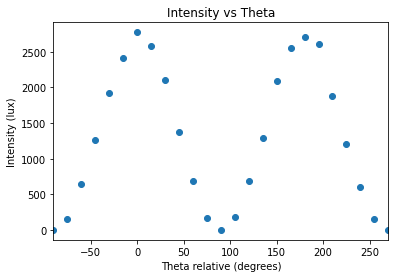

In [18]:
plt.errorbar(theta, intensity, yerr=0, fmt='o')
plt.xlabel('Theta relative (degrees)')
plt.ylabel('Intensity (lux)')
plt.title("Intensity vs Theta")
plt.xlim(-90, 270)
plt.show()

In [19]:
# Define model functions
def model(theta, i0, theta_0, Ibg):
    return i0*np.power(np.cos((theta - theta_0) * np.pi / 180), 2) + Ibg

In [25]:
# Set initial parameters
i0_init, theta_0_init, Ibg_init =[2000,0, 0]

# Perform the fit
start_pars=[i0_init, theta_0_init, Ibg_init]

pars, cov = opt.curve_fit(model, theta, intensity, p0=start_pars)
    
[I0, theta0, Ibg] = pars
   
# Error in fitting parameters
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[ 2.72797050e+03  3.74486277e+01]
 [ 1.31915983e-01  4.08697327e-01]
 [-2.81064246e+01  2.24691766e+01]]


In [26]:
print(I0, theta0, Ibg)

2727.970502900262 0.13191598337408575 -28.10642463031151
